### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

2. Investigate the dataset for missing or problematic data.

In [4]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Get a summary of the data
data_summary = data.describe()

missing_values

# The column car has 12,576 missing values. I'll consider dropping this column.
# Columns related to frequency of visits (like Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50) also have missing values, but the count is relatively smaller.

data_summary

# Most of the columns seem to be categorical in nature
# The target variable Y has a mean of 0.568, which means that 56.8% of the customers used the coupon


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# 1. Drop the 'car' column due to a high number of missing values
data.drop('car', axis=1, inplace=True)

# 2. Impute missing values in frequency of visits columns with the most frequent value
freq_columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for column in freq_columns:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)
    
# Check if there are any missing values left
missing_after_change = data.isnull().sum()

# There are no more missing values in the dataset
missing_after_change


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [6]:
# Calculate the proportion of observations where the coupon was accepted. 
coupon_accepted_proportion = data['Y'].mean()

# 56.8% of the customers used the coupon.
coupon_accepted_proportion

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

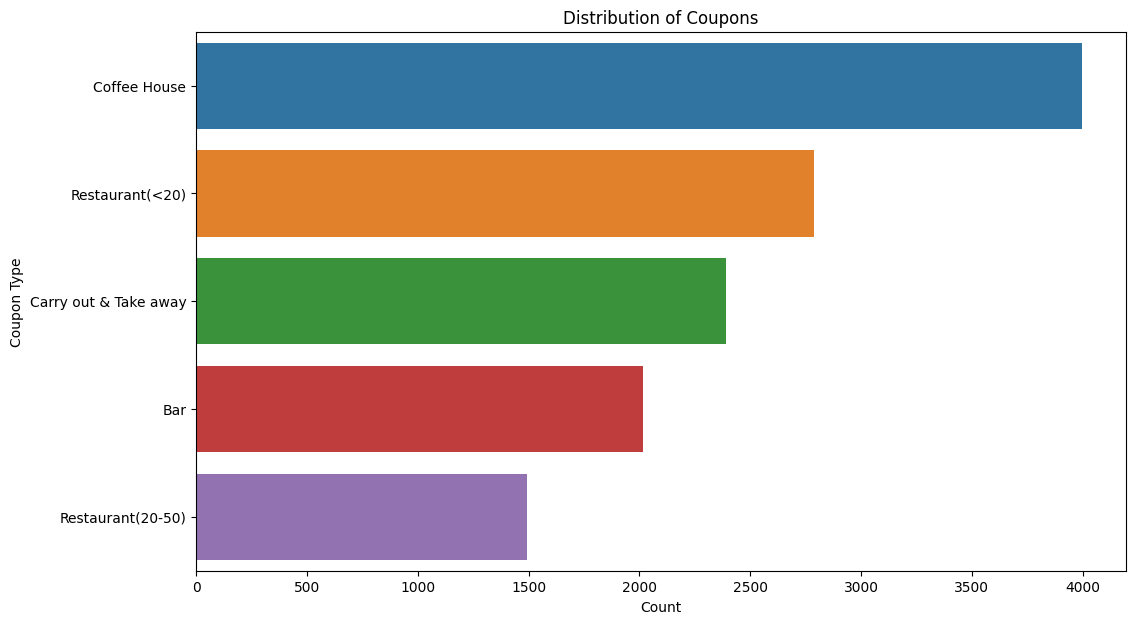

In [7]:
# Create a bar plot to visualize the 'coupon' column
plt.figure(figsize=(12, 7))
sns.countplot(data=data, y='coupon', order=data['coupon'].value_counts().index)
plt.title("Distribution of Coupons")
plt.xlabel("Count")
plt.ylabel("Coupon Type")
plt.show()

6. Use a histogram to visualize the temperature column.

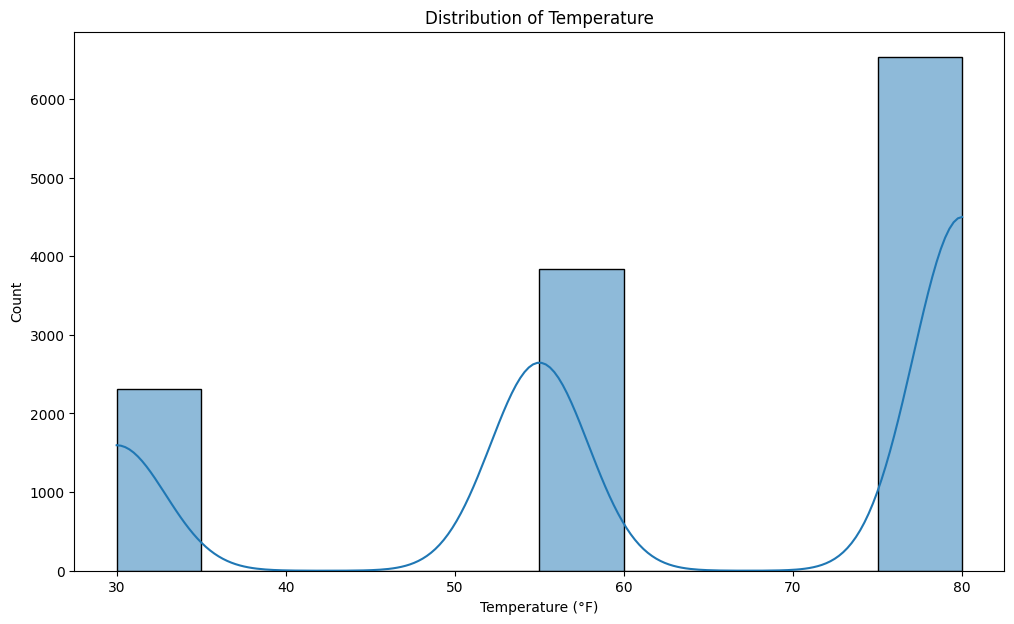

In [8]:
# Create a histogram to visualize the 'temperature' column
plt.figure(figsize=(12, 7))
sns.histplot(data=data, x='temperature', bins=10, kde=True)
plt.title("Distribution of Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Count")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
# Create a new dataframe containing only the observations where the coupon type is "Bar"
bar_coupons_df = data[data['coupon'] == 'Bar']

bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [10]:
# Calculate the proportion of bar coupons that were accepted
bar_coupon_accepted_proportion = bar_coupons_df['Y'].mean()

# 41% of bar coupons were accepted
bar_coupon_accepted_proportion

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
# Create two subsets:
# 1. Those who went to a bar 3 or fewer times a month
# 2. Those who went more than 3 times a month
bar_fewer_times = bar_coupons_df[bar_coupons_df['Bar'].isin(['never', 'less1', '1~3'])]
bar_more_times = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8'])]

# Calculate the acceptance rate for each group
acceptance_rate_fewer = bar_fewer_times['Y'].mean()
acceptance_rate_more = bar_more_times['Y'].mean()

acceptance_rate_fewer, acceptance_rate_more

(0.37073707370737075, 0.78)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:
# Convert the 'age' column to numeric for filtering
data['age_numeric'] = pd.to_numeric(data['age'], errors='coerce')

# Create two subsets:
# 1. Drivers who go to a bar more than once a month and are over the age of 25
# 2. All other drivers
bar_more_25plus = data[(data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age_numeric'] > 25)]
all_others = data.drop(bar_more_25plus.index)

# Calculate the acceptance rate for each group
acceptance_rate_bar_more_25plus = bar_more_25plus['Y'].mean()
acceptance_rate_all_others = all_others['Y'].mean()

# For drivers who go to a bar more than once a month and are over the age of 25, the acceptance rate is approximately 62.57%. For all other drivers, the acceptance rate is approximately 55.54%
acceptance_rate_bar_more_25plus, acceptance_rate_all_others


(0.625688851208139, 0.5553510895883778)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [13]:
# Create two subsets:
# 1. Drivers who go to a bar more than once a month, had passengers that were not kids, and had occupations other than farming, fishing, or forestry
specified_group = data[
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (~data['passanger'].isin(['Kid(s)'])) & 
    (~data['occupation'].isin(['Farming, Fishing, and Forestry']))
]

# 2. All other drivers
all_others_2 = data.drop(specified_group.index)

# Calculate the acceptance rate for each group
acceptance_rate_specified_group = specified_group['Y'].mean()
acceptance_rate_all_others_2 = all_others_2['Y'].mean()

# For drivers who go to a bar more than once a month, had passengers that were not kids, and had occupations other than farming, fishing, or forestry, the acceptance rate is approximately 62.3%. For all other drivers, the acceptance rate is approximately 54.6%
acceptance_rate_specified_group, acceptance_rate_all_others_2


(0.6231060606060606, 0.5459501557632399)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [14]:
# Define the three specified criteria
criteria_1 = (
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (~data['passanger'].isin(['Kid(s)'])) & 
    (~data['maritalStatus'].isin(['Widowed']))
)
criteria_2 = (
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (data['age_numeric'] < 30)
)
criteria_3 = (
    (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (data['income'] == 'Less than $12500')
)

# Create the subsets
specified_group_2 = data[criteria_1 | criteria_2 | criteria_3]
all_others_3 = data.drop(specified_group_2.index)

# Calculate the acceptance rate for each group
acceptance_rate_specified_group_2 = specified_group_2['Y'].mean()
acceptance_rate_all_others_3 = all_others_3['Y'].mean()

# For drivers who meet any of the three specified criteria, the acceptance rate is approximately 61.9%. For all other drivers, the acceptance rate is approximately 54.5%.
acceptance_rate_specified_group_2, acceptance_rate_all_others_3

(0.6190004948045522, 0.5447813006248553)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [15]:
# Frequency of Bar Visits: Drivers who visit bars more than once a month tend to accept bar coupons at a higher rate. This makes intuitive sense, as frequent bar-goers would likely be more interested in bar-related promotions

# Age Factor: Drivers under the age of 30 who frequently visit bars are more likely to accept bar coupons. This suggests that younger individuals might be more receptive to promotions or discounts related to bars.

# Companion and Marital Status: Drivers who are not accompanied by kids and those who are not widowed tend to accept bar coupons at a higher rate. This might indicate that people without familial responsibilities are more likely to accept bar coupons.

# Income and Restaurant Visits: Drivers with an income of less than $12,500 who frequently visit cheaper restaurants (more than 4 times a month) are more likely to accept bar coupons. This could indicate that individuals in this income bracket are more receptive to discounts.


# Summary - Drivers who are younger, frequently visit bars, have a lower income, are not accompanied by kids, and have an income of less than $12,500 seem to be more receptive to bar coupons. This could be due to their lifestyle, financial considerations, or leisure preferences. It would be beneficial for businesses to target such demographics more actively when promoting bar-related offers to optimize their marketing efforts.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [16]:
# Exploring the Restaurant (<20) coupon data

# Create a subset containing only the observations where the coupon type is "Restaurant(<20)"
restaurant20_df = data[data['coupon'] == 'Restaurant(<20)']

restaurant20_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_numeric
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,0,1,1,21.0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,1,21.0
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,1,21.0
10,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,0,1,1,21.0
11,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,1,21.0


In [17]:
# Calculate the acceptance rate for "Restaurant(<20)" coupons
restaurant20_acceptance_rate = restaurant20_df['Y'].mean()

restaurant20_acceptance_rate

0.7071069633883704

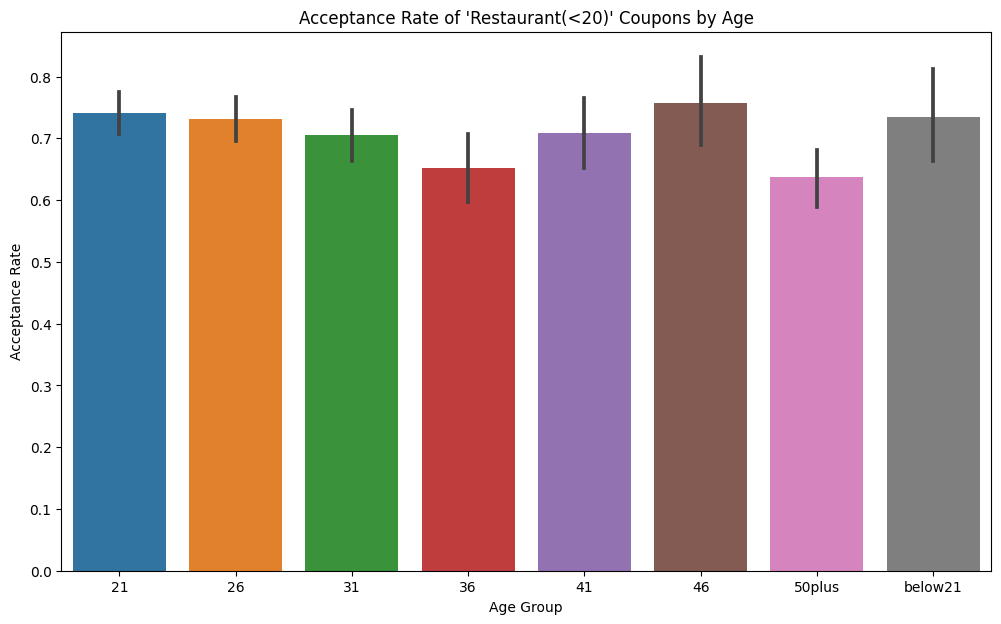

In [18]:
# Bar plot to visualize the acceptance rate based on 'age'
plt.figure(figsize=(12, 7))
sns.barplot(x='age', y='Y', data=restaurant20_df, order=sorted(restaurant20_df['age'].unique()))
plt.title("Acceptance Rate of 'Restaurant(<20)' Coupons by Age")
plt.ylabel("Acceptance Rate")
plt.xlabel("Age Group")
plt.show()

# Younger age groups, particularly those under the age of 30, tend to accept "Restaurant(<20)" coupons at a higher rate. The acceptance rate gradually decreases with age up to 36, starts to increase up to 46 and finally drops with the group "50plus" having the lowest rate.
# This suggests that younger individuals, particularly those under the age of 26 are more receptive to restaurant coupons

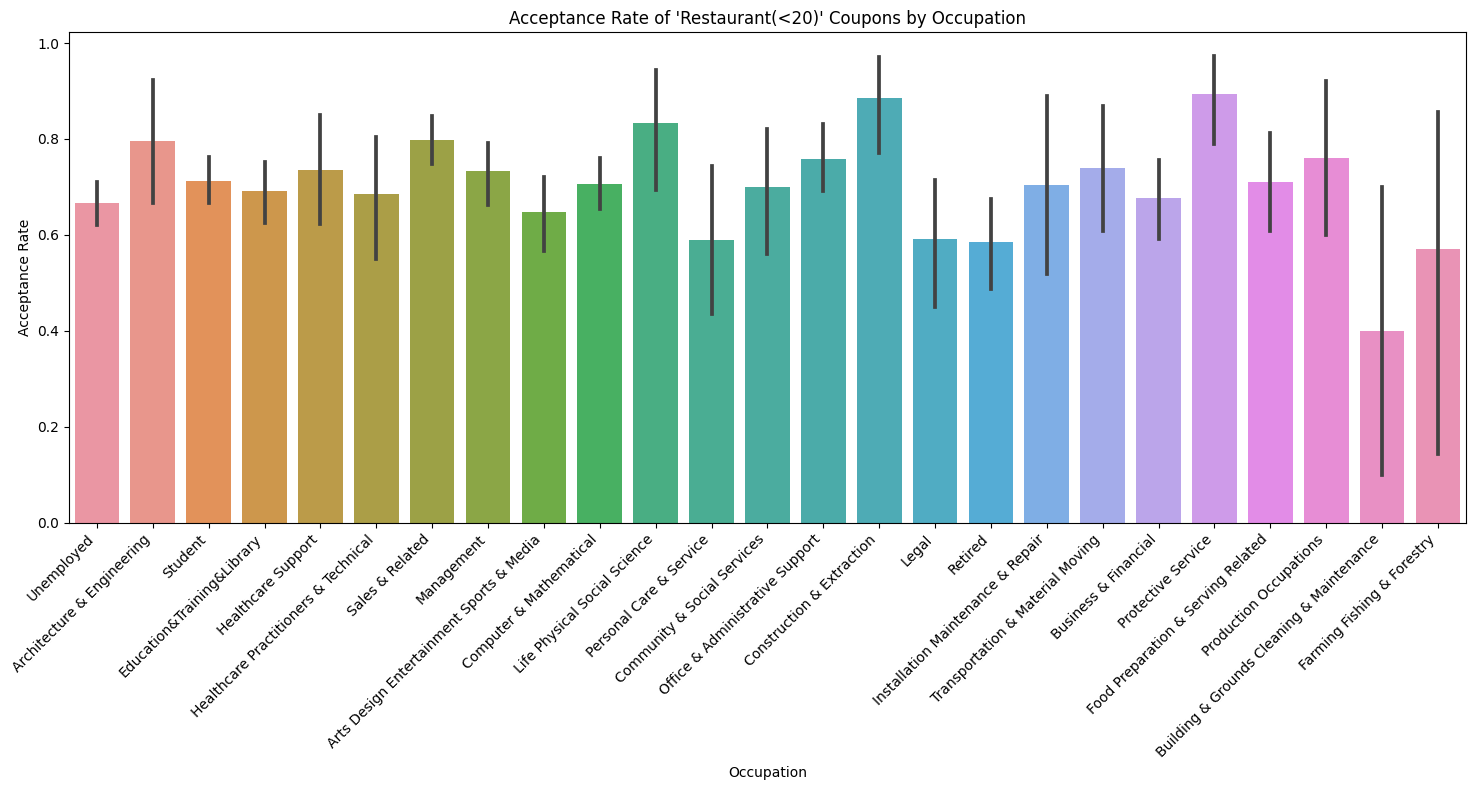

In [19]:
# Bar plot to visualize based on occupation

# Create a bar plot to visualize the acceptance rate based on 'occupation'
plt.figure(figsize=(15, 8))
sns.barplot(x='occupation', y='Y', data=restaurant20_df)
plt.title("Acceptance Rate of 'Restaurant(<20)' Coupons by Occupation")
plt.ylabel("Acceptance Rate")
plt.xlabel("Occupation")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Occupations such as "Architecture & Engineering", "Life Physical Social Science", "COnstruction & Extraction", and "Protective Services" exhibit higher acceptance rates. Certain professions may be more likely to accept restaurant coupons due to their lifestyle or financial considerations.

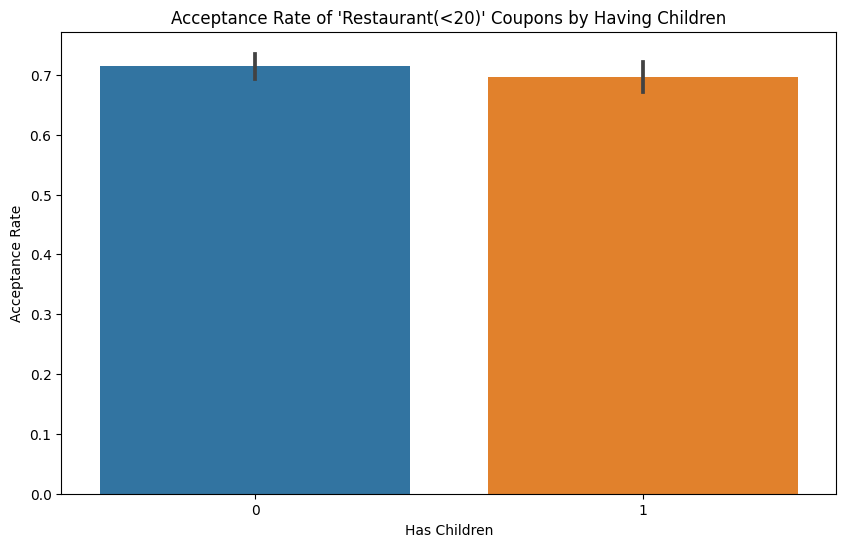

In [20]:
# Bar plot to visualize the acceptance rate based on 'has_children'
plt.figure(figsize=(10, 6))
sns.barplot(x='has_children', y='Y', data=restaurant20_df)
plt.title("Acceptance Rate of 'Restaurant(<20)' Coupons by Having Children")
plt.ylabel("Acceptance Rate")
plt.xlabel("Has Children")
plt.show()

# Drivers who do not have children tend to accept "Restaurant(<20)" coupons at a slightly higher rate.

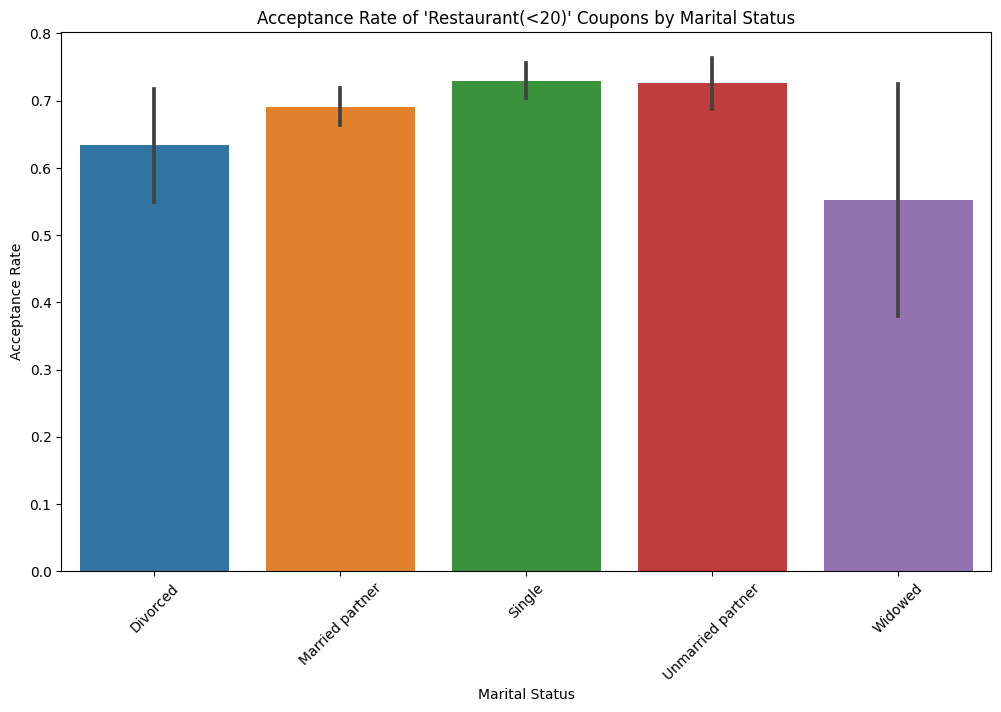

In [21]:
# bar plot to visualize the acceptance rate based on 'maritalStatus'
plt.figure(figsize=(12, 7))
sns.barplot(x='maritalStatus', y='Y', data=restaurant20_df, order=sorted(restaurant20_df['maritalStatus'].unique()))
plt.title("Acceptance Rate of 'Restaurant(<20)' Coupons by Marital Status")
plt.ylabel("Acceptance Rate")
plt.xlabel("Marital Status")
plt.xticks(rotation=45)
plt.show()

# Single drivers tend to accept "Restaurant(<20)" coupons at a higher rate.